## make histogram with ddd halo masses and dwarf masses from UM

plot we made after not working on this for a long time. did it right before Asher left

In [45]:
import numpy as np
import matplotlib.pyplot as plt

import h5py
import corner

In [71]:
from colossus.halo import mass_adv
from colossus.cosmology import cosmology
cosmology.setCosmology('planck15')

In [2]:
ddd_file = 'Data/ddd/ddd.hdf5'
ddd_table = h5py.File(ddd_file, 'r')

In [5]:
ddd_table.keys()

[u'mcmc']

In [7]:
ddd_table['mcmc'].keys()

[u'accepted', u'chain', u'log_prob']

In [16]:
ddd_table['mcmc']['chain']

<HDF5 dataset "chain": shape (1000, 128, 10), type "<f8">

In [46]:
chain = np.array(ddd_table['mcmc']['chain'])

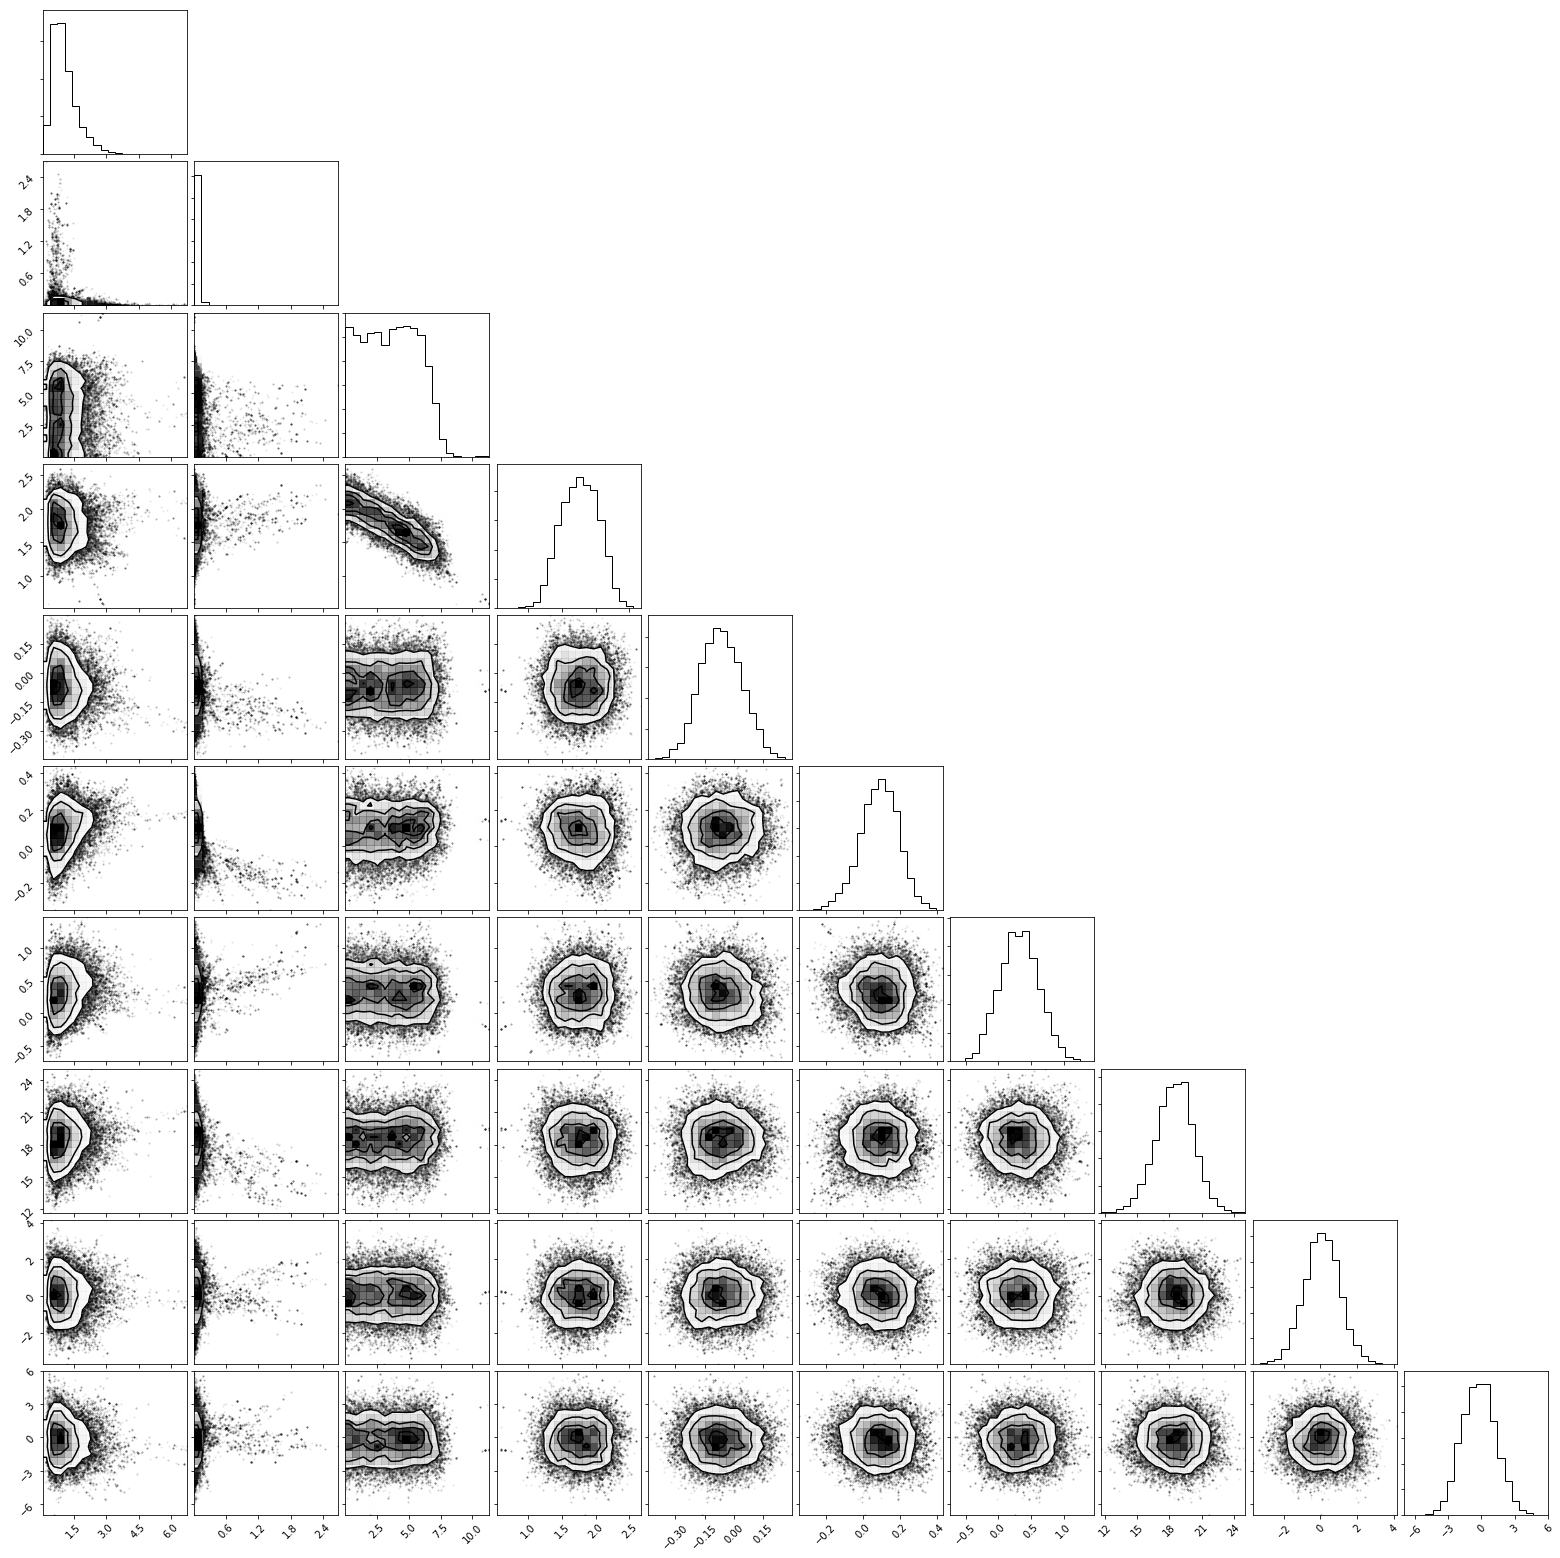

In [48]:
ndim=10
samples = chain[500:, :, :].reshape((-1, ndim))
fig = corner.corner(samples)

In [61]:
ddd_masses = np.array(ddd_table['mcmc']['chain'])[500:,:,2]

In [62]:
ddd_masses = masses.flatten()

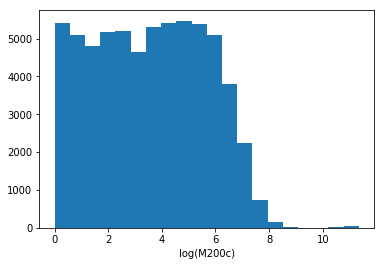

In [63]:
plt.hist(ddd_masses, bins=20)
plt.xlabel('log(M200c)')
plt.show()

In [72]:
#open UM best fit dwarf catalog
catalog_file = '/Users/fardila/Documents/GitHub/dwarf_lensing/mock_dwarfs/best_fit_mock_catalog_short.ascii'
UM_catalog = np.loadtxt(catalog_file, dtype={'names': ('halo_mvir', 'halo_mpeak', 'halo_Vmax@Mpeak', 'M_*'),
                                'formats': ('f8', 'f8', 'f8', 'f8')},
           skiprows=1)
UM_Mvir = UM_catalog['halo_mvir']

#convert to M200c
z_UM = 0.2786
UM_M200c, UM_r200c, UM_c200c = mass_adv.changeMassDefinitionCModel(UM_Mvir,
                                                                z_UM,
                                                                'vir', '200c',
                                                                profile='nfw',
                                                                c_model='diemer19')
UM_logM200c = np.log10(UM_M200c)

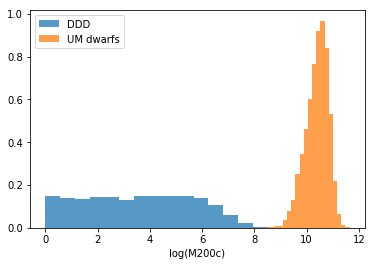

In [74]:
plt.hist(ddd_masses, bins=20, label='DDD', normed=True, alpha=0.75)
plt.hist(UM_logM200c, bins=20, label='UM dwarfs', normed=True, alpha=0.75)
plt.legend()
plt.xlabel('log(M200c)')
plt.show()